# Initial Block Propagation evaluation

## Gossipsub protocol

### Simulation parameters

* Number of nodes: [50,100,500]
* Latency between nodes: [5-100] ms
* Node bandwidth: 100 Mpbs
* Block size: 500KB
* No churn, no nodes down.
* Propagation time includes block transmission time and link latencies.


The following cell is just loading traces files into a dataframe

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

ops_path = {'50 nodes': '../python_logs/benign/GOSSIP/_size-50_blocksize-400000_blocktime-200/operation.csv',
            '100 nodes': '../python_logs/benign/GOSSIP/_size-100_blocksize-400000_blocktime-200/operation.csv',
            '500 nodes': '../python_logs/benign/GOSSIP/_size-500_blocksize-400000_blocktime-200/operation.csv',
            '1000 nodes': '../python_logs/benign/GOSSIP/_size-1000_blocksize-400000_blocktime-200/operation.csv'
           }

ops_path_size = {'100KB': '../python_logs/benign/GOSSIP/_size-100_blocksize-100000_blocktime-200/operation.csv',
            '400KB': '../python_logs/benign/GOSSIP/_size-100_blocksize-400000_blocktime-200/operation.csv',
            '500KB': '../python_logs/benign/GOSSIP/_size-100_blocksize-500000_blocktime-200/operation.csv',
            '1MB': '../python_logs/benign/GOSSIP/_size-100_blocksize-1000000_blocktime-200/operation.csv'
           }

ops_path_time = {'100ms': '../python_logs/benign/GOSSIP/_size-100_blocksize-400000_blocktime-100/operation.csv',
            '200ms': '../python_logs/benign/GOSSIP/_size-100_blocksize-400000_blocktime-200/operation.csv',
            '500ms': '../python_logs/benign/GOSSIP/_size-100_blocksize-400000_blocktime-500/operation.csv',
            '1 sec': '../python_logs/benign/GOSSIP/_size-100_blocksize-400000_blocktime-1000/operation.csv'
           }
#msgs_path = {'100 nodes': '../logsGossip100/messages.csv',
#            '1000 nodes': '../logsGossip1000/messages.csv',
 #           '10000 nodes': '../logsGossip10000/messages.csv'
#           }


#seq_address = '83814183170291850251680823880522715558189094423550585243365458794131648333116'

op_df={}
op_size_df={}
op_time_df={}
for key in ops_path:
    op_df[key] = pd.read_csv(ops_path[key],index_col=False,low_memory=False)
for key in ops_path_size:
    op_size_df[key] = pd.read_csv(ops_path_size[key],index_col=False,low_memory=False)
for key in ops_path_time:
    op_time_df[key] = pd.read_csv(ops_path_time[key],index_col=False,low_memory=False)

In this graph we observe the CDF of the time required for the nodes to receive the block from the sequencer

Text(0.5, 0, 'Propagation time (ms)')

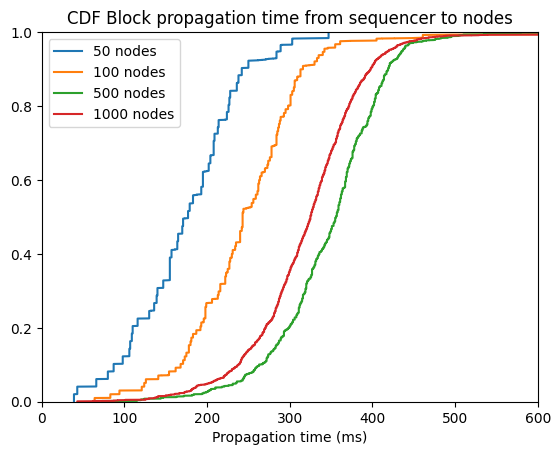

In [10]:
fig3, ax3 = plt.subplots()


for key in op_df:

    vsdf = op_df[key].loc[(op_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

ax3.set_xlim([0,600])
ax3.legend()
ax3.set_ylim([0,1])

ax3.set_title("CDF Block propagation time from sequencer to nodes")
ax3.set_xlabel("Propagation time (ms)")

In this graph we observe the CDF for the number of hops a block uses to go from the sequencer to a specific node (it just counts the first copy received)

Text(0.5, 0, 'Propagation time (ms)')

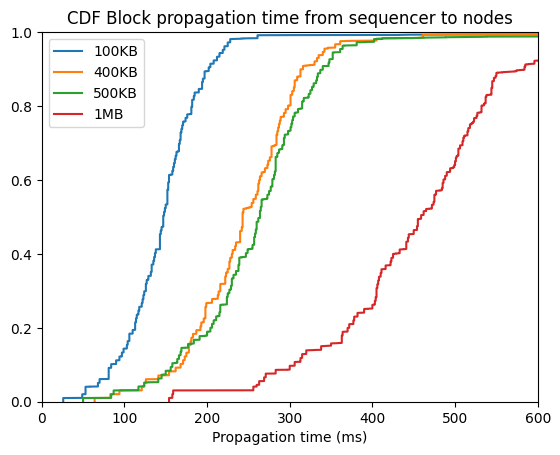

In [12]:
fig3, ax3 = plt.subplots()


for key in op_size_df:

    vsdf = op_size_df[key].loc[(op_size_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

ax3.set_xlim([0,600])
ax3.legend()
ax3.set_ylim([0,1])

ax3.set_title("CDF Block propagation time from sequencer to nodes")
ax3.set_xlabel("Propagation time (ms)")

Text(0.5, 0, 'Propagation time (ms)')

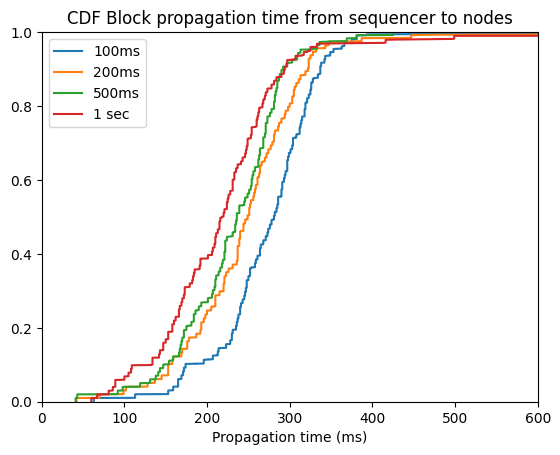

In [20]:
fig3, ax3 = plt.subplots()


for key in op_time_df:

    vsdf = op_time_df[key].loc[(op_time_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

ax3.set_xlim([0,600])
ax3.legend()
ax3.set_ylim([0,1])

ax3.set_title("CDF Block propagation time from sequencer to nodes")
ax3.set_xlabel("Propagation time (ms)")

Text(0.5, 0, '# hops')

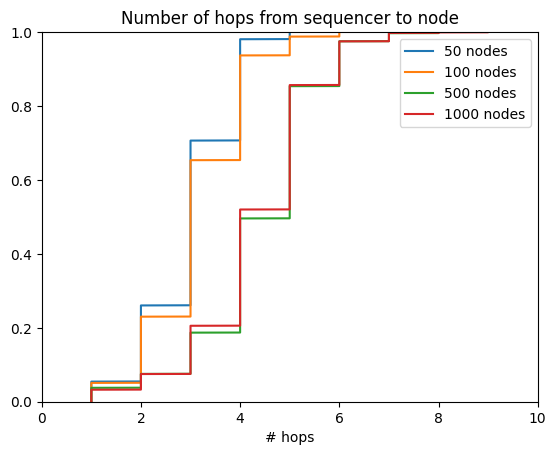

In [49]:
fig8, ax8 = plt.subplots()

for key in op_df:

    vsdf = op_df[key].loc[(op_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(vsdf['hops'])
    N = vsdf['hops'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax8.plot(x, y,label=key)

ax8.legend()
ax8.set_xlim([0,10])
ax8.set_ylim([0,1])

ax8.set_title("Number of hops from sequencer to node")
ax8.set_xlabel("# hops")

Text(0, 0.5, 'Propagation time (ms)')

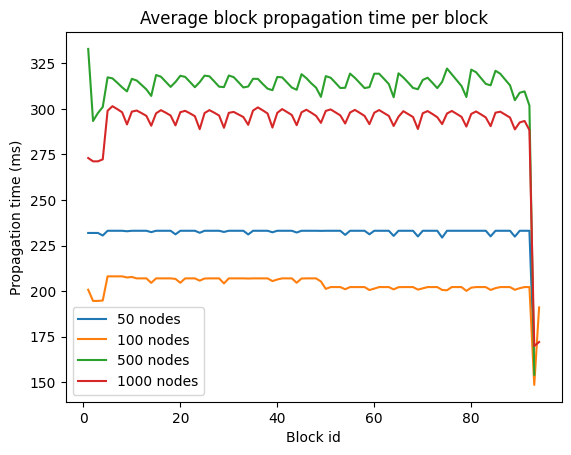

In [50]:
fig4, ax4 = plt.subplots()

for key in op_df:

    rsdf = op_df[key].loc[(op_df[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].mean())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0, 0.5, 'Propagation time (ms)')

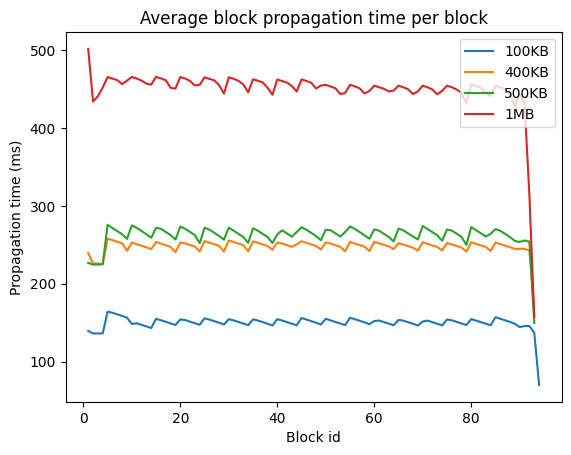

In [14]:
fig4, ax4 = plt.subplots()

for key in op_size_df:

    rsdf = op_size_df[key].loc[(op_size_df[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].mean())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0, 0.5, 'Propagation time (ms)')

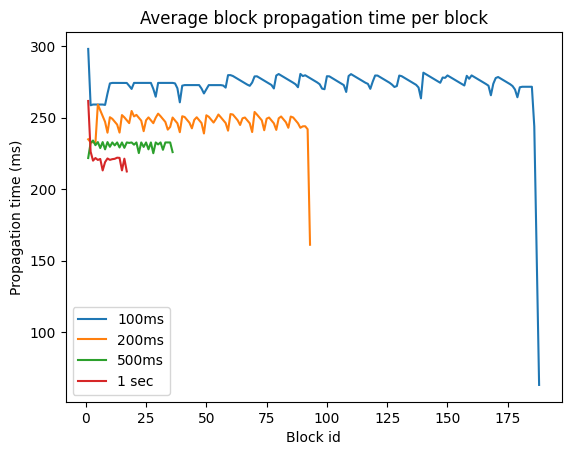

In [21]:
fig4, ax4 = plt.subplots()

for key in op_time_df:

    rsdf = op_time_df[key].loc[(op_time_df[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].mean())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0, 0.5, 'Propagation time (ms)')

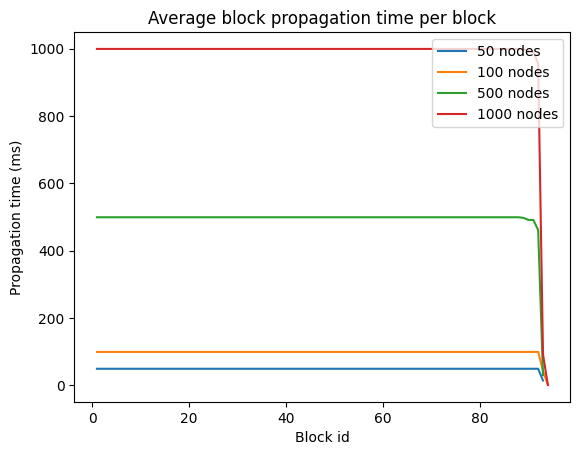

In [53]:
fig4, ax4 = plt.subplots()

for key in op_df:

    rsdf = op_df[key].loc[(op_df[key]['type'] == 'BlockGossipOperation')]
    x = rsdf['block_id'].unique()
    
    avg = []
    for i in x:
        avg.append(rsdf.loc[(rsdf['block_id'] == i)]['completion_time'].count())

    ax4.plot(x, avg,label=key)
    
    #print(x)
    #print(avg)

ax4.legend()
#ax4.set_xlim([0,15])
#ax4.set_ylim([0,1])

ax4.set_title("Average block propagation time per block")
ax4.set_xlabel("Block id")
ax4.set_ylabel("Propagation time (ms)")

Text(0.5, 0, '# replicates received per block')

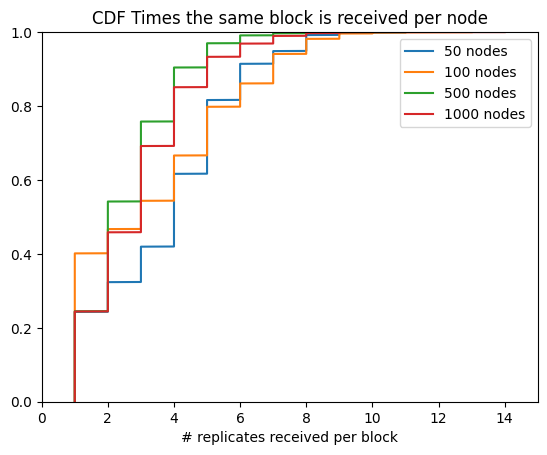

In [51]:
fig4, ax4 = plt.subplots()

for key in op_df:

    rsdf = op_df[key].loc[(op_df[key]['type'] == 'BlockGossipOperation')]

    x = np.sort(rsdf['num_messages'])
    N = rsdf['num_messages'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax4.plot(x, y,label=key)

ax4.legend()
ax4.set_xlim([0,15])
ax4.set_ylim([0,1])

ax4.set_title("CDF Times the same block is received per node")
ax4.set_xlabel("# replicates received per block")